In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

!pip install pandas numpy scikit-learn tensorflow matplotlib

#DATA LOADING

In [ ]:
#DATA LOADING
data = pd.read_csv("/content/esg_dataset.csv")
print(data)

print("Initial Data ")
print(data.info())

    Ticker_Symbol                   Company_Name currency  \
0             DIS                 Walt Disney Co      USD   
1              GM              General Motors Co      USD   
2             GWW                WW Grainger Inc      USD   
3             MHK          Mohawk Industries Inc      USD   
4             LYV  Live Nation Entertainment Inc      USD   
..            ...                            ...      ...   
717            HI                Hillenbrand Inc      USD   
718           HHC             Howard Hughes Corp      USD   
719          HUBS                    HubSpot Inc      USD   
720          HESM              Hess Midstream LP      USD   
721           HEI                     HEICO Corp      USD   

                          exchange                            Industry  \
0    NEW YORK STOCK EXCHANGE, INC.                               Media   
1    NEW YORK STOCK EXCHANGE, INC.                         Automobiles   
2    NEW YORK STOCK EXCHANGE, INC.  Trading C

In [ ]:
data

,Ticker_Symbol,Company_Name,currency,exchange,Industry,logo,weburl,environment_grade,environment_level,social_grade,...,governance_grade,governance_level,environment_score,social_score,governance_score,total_score,last_processing_date,total_grade,total_level,cik
0,DIS,Walt Disney Co,USD,"NEW YORK STOCK EXCHANGE, INC.",Media,https://static.finnhub.io/logo/ef50b4a2b263c84...,https://thewaltdisneycompany.com/,A,High,BB,...,BB,Medium,510,316,321,1147,19-04-2022,BBB,High,1744489
1,GM,General Motors Co,USD,"NEW YORK STOCK EXCHANGE, INC.",Automobiles,https://static.finnhub.io/logo/9253db78-80c9-1...,https://www.gm.com/,A,High,BB,...,B,Medium,510,303,255,1068,17-04-2022,BBB,High,1467858
2,GWW,WW Grainger Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Trading Companies and Distributors,https://static.finnhub.io/logo/f153dcda-80eb-1...,https://www.grainger.com/,B,Medium,BB,...,B,Medium,255,385,240,880,19-04-2022,BB,Medium,277135
3,MHK,Mohawk Industries Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Consumer products,https://static.finnhub.io/logo/26868a62-80ec-1...,https://mohawkind.com/,A,High,B,...,BB,Medium,570,298,303,1171,18-04-2022,BBB,High,851968
4,LYV,Live Nation Entertainment Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Media,https://static.finnhub.io/logo/1cd144d2-80ec-1...,https://www.livenationentertainment.com/,BBB,High,BB,...,B,Medium,492,310,250,1052,18-04-2022,BBB,High,1335258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,HI,Hillenbrand Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Machinery,https://static.finnhub.io/logo/f56bfd2c-80eb-1...,https://www.hillenbrand.com/,BBB,High,BB,...,BB,Medium,489,349,300,1138,07-11-2022,BBB,High,1417398
718,HHC,Howard Hughes Corp,USD,"NEW YORK STOCK EXCHANGE, INC.",Real Estate,https://static.finnhub.io/logo/6445e7f28561553...,https://www.howardhughes.com/,A,High,BB,...,BB,Medium,500,300,300,1100,07-11-2022,BBB,High,1498828
719,HUBS,HubSpot Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Technology,https://static.finnhub.io/logo/62f8c2fa-80d0-1...,https://www.hubspot.com/,BBB,High,BB,...,BB,Medium,480,329,320,1129,07-11-2022,BBB,High,1404655
720,HESM,Hess Midstream LP,USD,"NEW YORK STOCK EXCHANGE, INC.",Energy,https://static.finnhub.io/logo/3a3f1306ad581fe...,https://www.hessmidstream.com/,BB,Medium,B,...,B,Medium,307,257,255,819,15-11-2022,BB,Medium,1789832


# DATA PREPROCESSING

In [ ]:
from sklearn.impute import SimpleImputer
data_dropped_rows = data.dropna()
print("\nAfter Dropping Rows with Missing Values:")
print(data_dropped_rows.info())

data_ffill = data.ffill()
print("\nAfter Forward Fill:")
print(data_ffill.info())

data_bfill = data.bfill()
print("\nAfter Backward Fill:")
print(data_bfill.info())

num_cols = data.select_dtypes(include=[np.number]).columns
mean_imputer = SimpleImputer(strategy='mean')
data[num_cols] = mean_imputer.fit_transform(data[num_cols])
print("\nAfter Mean Imputation:")
print(data.info())

cat_cols = data.select_dtypes(include=['object']).columns
mode_imputer = SimpleImputer(strategy='most_frequent')
data[cat_cols] = mode_imputer.fit_transform(data[cat_cols])

data_interpolated = data.interpolate(method='linear')
print("\nAfter Interpolation:")
print(data_interpolated.info())

data.to_csv('cleaned_data.csv', index=False)
print("\nCleaned Data Preview:")
data




After Dropping Rows with Missing Values:
<class 'pandas.core.frame.DataFrame'>
Index: 695 entries, 0 to 721
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Ticker_Symbol         695 non-null    object
 1   Company_Name          695 non-null    object
 2   currency              695 non-null    object
 3   exchange              695 non-null    object
 4   Industry              695 non-null    object
 5   logo                  695 non-null    object
 6   weburl                695 non-null    object
 7   environment_grade     695 non-null    object
 8   environment_level     695 non-null    object
 9   social_grade          695 non-null    object
 10  social_level          695 non-null    object
 11  governance_grade      695 non-null    object
 12  governance_level      695 non-null    object
 13  environment_score     695 non-null    int64 
 14  social_score          695 non-null    int64 
 15  gov

<ipython-input-85-8898a6295f38>:24: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data_interpolated = data.interpolate(method='linear')


,Ticker_Symbol,Company_Name,currency,exchange,Industry,logo,weburl,environment_grade,environment_level,social_grade,...,governance_grade,governance_level,environment_score,social_score,governance_score,total_score,last_processing_date,total_grade,total_level,cik
0,DIS,Walt Disney Co,USD,"NEW YORK STOCK EXCHANGE, INC.",Media,https://static.finnhub.io/logo/ef50b4a2b263c84...,https://thewaltdisneycompany.com/,A,High,BB,...,BB,Medium,510.0,316.0,321.0,1147.0,19-04-2022,BBB,High,1744489.0
1,GM,General Motors Co,USD,"NEW YORK STOCK EXCHANGE, INC.",Automobiles,https://static.finnhub.io/logo/9253db78-80c9-1...,https://www.gm.com/,A,High,BB,...,B,Medium,510.0,303.0,255.0,1068.0,17-04-2022,BBB,High,1467858.0
2,GWW,WW Grainger Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Trading Companies and Distributors,https://static.finnhub.io/logo/f153dcda-80eb-1...,https://www.grainger.com/,B,Medium,BB,...,B,Medium,255.0,385.0,240.0,880.0,19-04-2022,BB,Medium,277135.0
3,MHK,Mohawk Industries Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Consumer products,https://static.finnhub.io/logo/26868a62-80ec-1...,https://mohawkind.com/,A,High,B,...,BB,Medium,570.0,298.0,303.0,1171.0,18-04-2022,BBB,High,851968.0
4,LYV,Live Nation Entertainment Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Media,https://static.finnhub.io/logo/1cd144d2-80ec-1...,https://www.livenationentertainment.com/,BBB,High,BB,...,B,Medium,492.0,310.0,250.0,1052.0,18-04-2022,BBB,High,1335258.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,HI,Hillenbrand Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Machinery,https://static.finnhub.io/logo/f56bfd2c-80eb-1...,https://www.hillenbrand.com/,BBB,High,BB,...,BB,Medium,489.0,349.0,300.0,1138.0,07-11-2022,BBB,High,1417398.0
718,HHC,Howard Hughes Corp,USD,"NEW YORK STOCK EXCHANGE, INC.",Real Estate,https://static.finnhub.io/logo/6445e7f28561553...,https://www.howardhughes.com/,A,High,BB,...,BB,Medium,500.0,300.0,300.0,1100.0,07-11-2022,BBB,High,1498828.0
719,HUBS,HubSpot Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Technology,https://static.finnhub.io/logo/62f8c2fa-80d0-1...,https://www.hubspot.com/,BBB,High,BB,...,BB,Medium,480.0,329.0,320.0,1129.0,07-11-2022,BBB,High,1404655.0
720,HESM,Hess Midstream LP,USD,"NEW YORK STOCK EXCHANGE, INC.",Energy,https://static.finnhub.io/logo/3a3f1306ad581fe...,https://www.hessmidstream.com/,BB,Medium,B,...,B,Medium,307.0,257.0,255.0,819.0,15-11-2022,BB,Medium,1789832.0


In [ ]:

from sklearn.preprocessing import MinMaxScaler
data = pd.read_csv('/content/cleaned_data.csv')
print(data)
print("Initial Data :")
print(data.info())

num_cols = data.select_dtypes(include=[np.number]).columns
scaler = MinMaxScaler()

data[num_cols] = scaler.fit_transform(data[num_cols])

print("\nData Info After Min-Max Scaling:")
print(data.info())
data.to_csv('normalized_data_esg.csv', index=False)
print("\nNormalized Data Preview:")
print(data.head())


    Ticker_Symbol                   Company_Name currency  \
0             DIS                 Walt Disney Co      USD   
1              GM              General Motors Co      USD   
2             GWW                WW Grainger Inc      USD   
3             MHK          Mohawk Industries Inc      USD   
4             LYV  Live Nation Entertainment Inc      USD   
..            ...                            ...      ...   
717            HI                Hillenbrand Inc      USD   
718           HHC             Howard Hughes Corp      USD   
719          HUBS                    HubSpot Inc      USD   
720          HESM              Hess Midstream LP      USD   
721           HEI                     HEICO Corp      USD   

                          exchange                            Industry  \
0    NEW YORK STOCK EXCHANGE, INC.                               Media   
1    NEW YORK STOCK EXCHANGE, INC.                         Automobiles   
2    NEW YORK STOCK EXCHANGE, INC.  Trading C

In [ ]:
from sklearn.impute import SimpleImputer
data = pd.read_csv('/content/financial_dataset.csv')
print(data)
data = pd.read_csv('financial_dataset.csv')
print("Initial Data Info:")
print(data.info())

data_dropped_rows = data.dropna()
print("\nAfter Dropping Rows with Missing Values:")
print(data_dropped_rows.info())

data_ffill = data.ffill()
print("\nAfter Forward Fill:")
print(data_ffill.info())

data_bfill = data.bfill()
print("\nAfter Backward Fill:")
print(data_bfill.info())

data.replace([np.inf, -np.inf], np.nan, inplace=True)

num_cols = data.select_dtypes(include=[np.number]).columns
mean_imputer = SimpleImputer(strategy='mean')
data[num_cols] = mean_imputer.fit_transform(data[num_cols])
print("\nAfter Mean Imputation:")
print(data.info())

cat_cols = data.select_dtypes(include=['object']).columns
mode_imputer = SimpleImputer(strategy='most_frequent')
data[cat_cols] = mode_imputer.fit_transform(data[cat_cols])

data_interpolated = data.interpolate(method='linear')
print("\nAfter Interpolation:")
print(data_interpolated.info())
data.to_csv('cleaned_data_finacial.csv', index=False)
print("\nCleaned Data Preview:")
print(data.head())

                        Company_Name Ticker_Symbol                  Sector  \
0          Walt Disney Company (The)           DIS  Communication Services   
1             General Motors Company            GM       Consumer Cyclical   
2                W.W. Grainger, Inc.           GWW             Industrials   
3            Mohawk Industries, Inc.           MHK       Consumer Cyclical   
4    Live Nation Entertainment, Inc.           LYV  Communication Services   
..                               ...           ...                     ...   
717                  Hillenbrand Inc            HI             Industrials   
718                              NaN           HHC                     NaN   
719                    HubSpot, Inc.          HUBS              Technology   
720                Hess Midstream LP          HESM                  Energy   
721                Heico Corporation           HEI             Industrials   

                               Industry        Country       Re

<ipython-input-87-9728424ba511>:32: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data_interpolated = data.interpolate(method='linear')


In [ ]:

import pandas as pd
data = pd.read_csv('/content/cleaned_data_finacial.csv')
print(data)

tickers_to_keep = ['DIS', "GM", "GWW", "MHK", "LYV", "LVS", "CLX",
"AACG", "AAL", "AAME", "AAOI", "AAON", "AAPL", "AATC",
 "AWWW", "AACI", "AADI", "ABEO", "ABNB", "ABIO",
"ABMD", "ABOS", "ABSI", "ABTX", "ABUS", "ABVC", "ACAD",
 "ACAC", "ACCD", "ACET", "ABCL", "ABCB", "ACEV",
"ACHL", "ACHC", "ACIW", "ACLS", "ACIU", "ACHV", "ACMR",
 "ACOR", "ACNB", "ACRS", "ACRX", "ACT", "ACTG",
"ACVA", "ADAG", "ACXP", "ADBE", "ADAP", "ADMA", "ADES",
 "ADI", "ADIL", "ADMP", "ACER", "ADOC", "ADUS",
"ACGL", "ADPT", "ADSK", "ADP", "ADTX", "ADV", "ADVM",
 "AEHR", "AEHL", "AEI", "AEIS", "AEP", "AEMD", "AESE",
"AEYE", "AERI", "AEY", "AFAQ", "AFMD", "AFCG",
 "AFBI", "AFRM", "AFIB", "AGEN", "AFYA", "AGFS",
"AGFY", "AGIL", "AGMH", "AGIO", "AGLE", "AGNC", "AGRI",
 "AGRX", "AGYS", "AGTC", "AHCO", "AHPI", "AIB",
"ADTN", "ADN", "AIKI", "AKIC", "AIP", "AKRO", "AIRT",
 "AIMC", "AKBA", "AIRG", "AIRS", "AKAM", "AKU",
"AKUS", "AKTS", "AKTX", "ALBO", "AKYA", "ALCO", "ALDX",
 "ALEC", "ALGM", "ALF", "ALGN", "ALGS", "ALHC",
"ALKS", "ALIM", "ALGT", "AIH", "ALKT", "ALNY", "ALLT",
 "ALLO", "AMAT", "AMD", "ATVI", "AVGO", "ANSS",
"AMZN", "AIHS", "APA", "BIIB", "BKNG", "CDNS", "CDW",
 "CHRW", "CINF", "CHTR", "CMCSA", "CPRT", "COST",
"CSX", "CTSH", "CME", "CSCO", "CTAS", "CTXS", "CZR",
 "DISH", "DLTR", "DXCM", "EA", "LNT", "FANG", "EBAY",
"LKQ", "GOOGL", "MAR", "MCHP", "LRCX", "MDLZ",
 "META", "MKTX", "MNST", "MRNA", "MTCH", "MPWR",
"MSFT", "MU", "NDAQ", "NLOK", "NTRS", "NWL", "NVDA",
 "ALLK", "NWSA", "ODFL", "PCAR", "NXPI", "ORLY",
"PAYX", "PFG", "ROST", "SBAC", "QCOM", "POOL", "PEP",
 "SBUX", "REG", "QRVO", "PTC", "PENN", "PYPL", "REGN",
"AMGN", "SNPS", "STX", "TECH", "TER", "SWKS",
 "TRMB", "TROW", "TTWO", "TSLA", "TSCO", "TXN",
"TMUS", "UAL", "VRSK", "ULTA", "VRTX", "VTRS", "VRSN",
 "WBA", "NTAP", "XEL", "XRAY", "ZBRA", "AAP", "ZION",
"WYNN", "A", "ABBV", "ABC", "ADM", "ABT", "AEE",
 "AES", "AFL", "ACN", "AJG", "AIZ", "ALK", "ALB",
"AIG", "ALL", "ALLE", "AMP", "AME", "AMT", "AOS",
 "APD", "AON", "ANET", "APH", "ATO", "AWK", "ARE",
"APTV", "AVB", "AVY", "BA", "BAC", "BAX", "BBWI",
 "BDX", "BIO", "BBY", "BK", "AXP", "BR", "BMY", "BRO",
"AZO", "BSX", "BX", "BXP", "SIVB", "C", "CAT",
 "CARR", "CBRE", "CCI", "CDAY", "CMA", "DHI", "DOV",
"DRI", "CE", "DG", "CMG", "DGX", "CCL", "CHD",
 "DOW", "DFS", "DUK", "DRE", "CF", "DVN", "ECL", "HD",
"DTE", "EIX", "GLW", "DVA", "WDC", "GS", "DXC",
 "ETN", "ED", "HSY", "JNJ", "JPM", "KO", "KMX",
"LDOS", "LEG", "MCD", "LIN", "LUMN", "LYB", "MCO",
 "MCK", "MAS", "LOW", "MDT", "MKC", "MET", "MGM",
"MMC", "MO", "BWA", "MRK", "MRO", "MPC", "MS", "MTB",
 "MTD", "MSI", "NEE", "MSCI", "NCLH", "NI", "NOC",
"NOW", "NUE", "NLSN", "NSC", "NVR", "PGR", "PFE",
 "PHM", "PH", "PKI", "PLD", "PPG", "PSA", "PNC", "PM",
"PKG", "PSX", "PRU", "PNR", "PNW", "PPL", "PWR",
 "RJF", "RF", "RCL", "RL", "PVH", "RHI", "PXD", "ROL",
"RMD", "SCHW", "ROK", "TDG", "SEE", "ROP", "SWK",
 "STZ", "SYK", "SYY", "SHW", "SPGI", "STE", "SYF",
"SPG", "SRE", "SO", "STT", "SNA", "RTX", "HIG",
"TEL", "TFX", "TFC", "TDY", "TGT", "TJX", "TPR",
"TRV", "TMO", "TT", "TSN", "TYL", "TXT", "UNH",
 "UPS", "UDR", "UHS", "MOS", "USB", "URI", "VNO",
"VLO", "VFC", "V", "VTR", "VMC", "WEC", "WELL",
 "WAT", "WM", "WAB", "WMB", "WFC", "WHR", "WST",
"WRB", "WMT", "WU", "YUM", "XYL", "WY", "WRK", "XOM",
 "ZBH", "ZTS", "DE", "DD", "D", "CVS", "DAL", "CRM",
"CVX", "CTVA", "CTRA", "CTLT", "CPB", "CRL", "COP",
 "COO", "COF", "CNC", "CNP", "CMS", "CMI", "CL",
"MMM", "CFG", "CAG", "CI", "CAH", "MA", "LW", "MAA",
 "MLM", "LUV", "LNC", "LEN", "PG", "OGN", "OXY",
"DELL", "PAYC", "PEG", "OKE", "NRG", "L", "OMC","ORCL", "O", "DPZ", "T", "UNP", "NEM", "FDX", "NKE",
"F", "LMT", "RSG", "ENPH", "EXC", "EXPD", "EXPE",
 "FAST", "FFIV", "FISV", "EQIX", "FTNT", "ETSY",
"BEN", "DLR", "DHR", "EFX", "EL", "EMN", "EMR", "EOG",
 "EQR", "ES", "ESS", "FITB", "ETR", "EXR", "EW",
"FOXA", "FCX", "FE", "FLT", "FIS", "FRC", "FMC", "FRT",
 "FTV", "GPS", "GRMN", "IT", "LLY", "RE", "EVRG",
"FBHS", "GILD", "HOLX", "HSIC", "HON", "HST", "GD",
 "HAS", "HBAN", "GL", "GPC", "GNRC", "GPN", "HCA",
"HBI", "HII", "HPE", "HES", "HLT", "HRL", "HPQ",
 "HUM", "HWM", "PEAK", "GIS", "GE", "SPOT", "TRTN",
"TRTX", "TRU", "YETI", "YELP", "YEXT", "SPR",
 "YSG", "YRD", "YUMC", "TROX", "ZEPP", "ZEV", "ZUO",
"ZIM", "ZYME", "ZWS", "YOU", "ZEN", "PLXS",
 "SHIP", "SHLS", "SHOO", "SHYF", "SIBN", "SIEB",
"PLYA", "WWE", "PMCB", "WWW", "XHR", "X", "XPEV",
 "XPO", "XIN", "XL", "XYF", "Y", "YALA", "WTS",
"SIEN", "HAIN", "MTC", "MTCR", "MTEM", "MTLS", "MTEX",
 "MTRX", "HALO", "HALL", "MVBF", "MVST", "MVIS",
"MXCT", "MYGN", "MYFW", "MXL", "MYMD", "MYPS",
 "MTTR", "MTSI", "CLRO", "CLSN", "GURE", "GVP",
"GYRO", "GWRS", "HA", "CLSK", "CLSD", "HAAC", "HAFC",
 "CLST", "CLWT", "CLXT", "CMBM", "CMCO", "EVK",
"CLVS", "CLVR", "HAPP", "HBCP", "HBIO", "HBNC", "HBT",
 "HCAT", "HCAR", "HARP", "HAYN", "PNBK", "HCDI",
"HCCI", "PNFP", "PNT", "POAI", "POLA", "PODD", "POWI",
 "POWW", "PNRG", "PNTG", "PPBI", "PPIH", "PPC",
"PRAA", "PPSI", "PRAX", "PRCT", "PRCH", "PRE", "PRDO",
 "SISI", "SITM", "SIRI", "SJ", "POW", "POWL", "UPWK",
"USAK", "USAU", "USAP", "USEG", "USIO", "UTHR",
 "URGN", "URBN", "UTME", "UTRS", "UTSI", "UXIN",
"UVSP", "CMCM", "CMC", "USLM", "UTMD", "CMP", "CND",
 "CNF", "CNMD", "CNK", "CNNE", "CNO", "CNA", "CMRE","GVA", "FN", "H", "HASI", "HAYW", "HBB", "HCC",
 "HCI", "HE", "GWRE", "HAE", "HEP", "HGV", "HI",
"HHC", "HUBS", "HESM", "HEI"
]

filtered_data = data[data['Ticker_Symbol'].isin(tickers_to_keep)]

filtered_data.to_csv('filter_data.csv', index=False)
print("\Filter Data Preview:")
print(data.head())

                        Company_Name Ticker_Symbol                  Sector  \
0          Walt Disney Company (The)           DIS  Communication Services   
1             General Motors Company            GM       Consumer Cyclical   
2                W.W. Grainger, Inc.           GWW             Industrials   
3            Mohawk Industries, Inc.           MHK       Consumer Cyclical   
4    Live Nation Entertainment, Inc.           LYV  Communication Services   
..                               ...           ...                     ...   
717                  Hillenbrand Inc            HI             Industrials   
718                       3M Company           HHC              Healthcare   
719                    HubSpot, Inc.          HUBS              Technology   
720                Hess Midstream LP          HESM                  Energy   
721                Heico Corporation           HEI             Industrials   

                               Industry        Country       Re

In [ ]:
#normalize financial dataset
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
data = pd.read_csv('/content/filter_data.csv')
print(data)
print("Initial Data :")
print(data.info())

num_cols = data.select_dtypes(include=[np.number]).columns
scaler = MinMaxScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])
print("\nData Info After Min-Max Scaling:")
print(data.info())
data.to_csv('normalized_data_financial.csv',index=False)
print("\nNormalized Data Preview:")
print(data.head())

                        Company_Name Ticker_Symbol                  Sector  \
0          Walt Disney Company (The)           DIS  Communication Services   
1             General Motors Company            GM       Consumer Cyclical   
2                W.W. Grainger, Inc.           GWW             Industrials   
3            Mohawk Industries, Inc.           MHK       Consumer Cyclical   
4    Live Nation Entertainment, Inc.           LYV  Communication Services   
..                               ...           ...                     ...   
717                  Hillenbrand Inc            HI             Industrials   
718                       3M Company           HHC              Healthcare   
719                    HubSpot, Inc.          HUBS              Technology   
720                Hess Midstream LP          HESM                  Energy   
721                Heico Corporation           HEI             Industrials   

                               Industry        Country       Re

In [ ]:
#merging datasets
df1=pd.read_csv('/content/normalized_data_esg.csv')
df2=pd.read_csv('/content/normalized_data_financial.csv')
merged_df=pd.merge(df1,df2,on='Ticker_Symbol',how='inner')
merged_df_cleaned = merged_df.rename(columns={'Company_Name_x': 'Company_Name'}).drop(columns=['Company_Name_y', 'Industry_y'])

print(merged_df_cleaned)
merged_df_cleaned.to_csv('merged_df_cleaned.csv',index='False')



    Ticker_Symbol                   Company_Name currency  \
0             DIS                 Walt Disney Co      USD   
1              GM              General Motors Co      USD   
2             GWW                WW Grainger Inc      USD   
3             MHK          Mohawk Industries Inc      USD   
4             LYV  Live Nation Entertainment Inc      USD   
..            ...                            ...      ...   
716            HI                Hillenbrand Inc      USD   
717           HHC             Howard Hughes Corp      USD   
718          HUBS                    HubSpot Inc      USD   
719          HESM              Hess Midstream LP      USD   
720           HEI                     HEICO Corp      USD   

                          exchange                          Industry_x  \
0    NEW YORK STOCK EXCHANGE, INC.                               Media   
1    NEW YORK STOCK EXCHANGE, INC.                         Automobiles   
2    NEW YORK STOCK EXCHANGE, INC.  Trading C

# EDA

In [ ]:
value_to_count1 = "A"
value_to_count2 = "AA"
value_to_count3 = "B"
value_to_count4 = "BB"
value_to_count5 = "BBB"
count1 = df1["environment_grade"].value_counts()[value_to_count1]
count2 = df1["environment_grade"].value_counts()[value_to_count2]
count3 = df1["environment_grade"].value_counts()[value_to_count3]
count4 = df1["environment_grade"].value_counts()[value_to_count4]
count5 = df1["environment_grade"].value_counts()[value_to_count5]

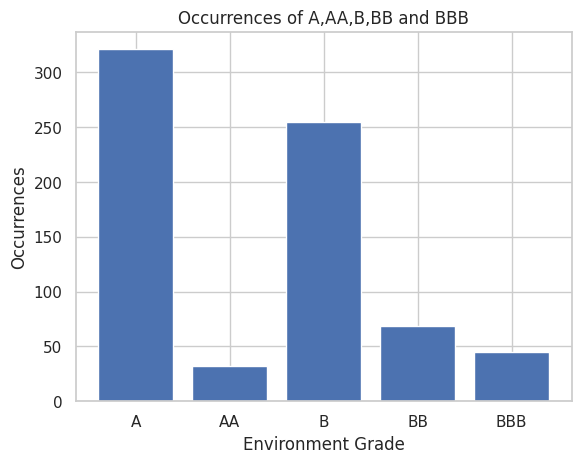

In [ ]:
plt.bar([value_to_count1, value_to_count2, value_to_count3, value_to_count4, value_to_count5], [count1, count2, count3, count4, count5])
plt.xlabel('Environment Grade')
plt.ylabel('Occurrences')
plt.title('Occurrences of ' + value_to_count1 + "," + value_to_count2+ "," + value_to_count3 + "," + value_to_count4 + " and " + value_to_count5)
plt.show()

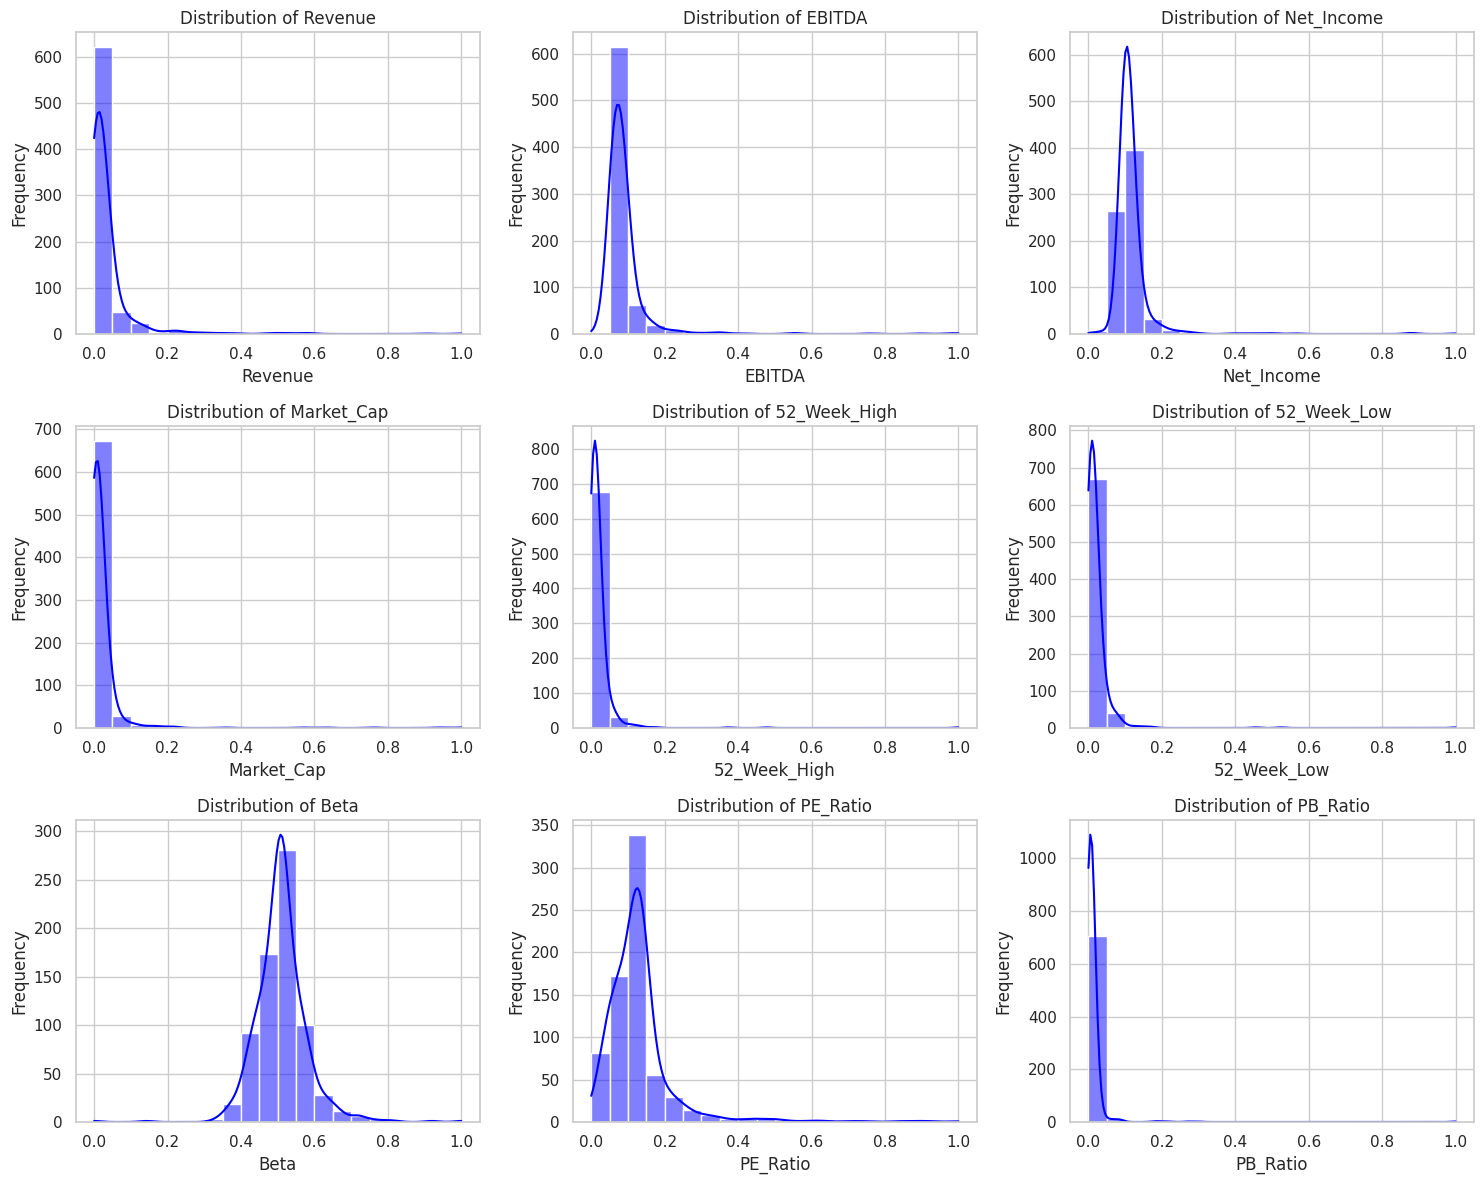

In [ ]:

numerical_columns = ['Revenue', 'EBITDA', 'Net_Income', 'Market_Cap', '52_Week_High', '52_Week_Low', 'Beta', 'PE_Ratio', 'PB_Ratio']
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for ax, column in zip(axes, numerical_columns):
    sns.histplot(merged_df_cleaned[column], kde=True, ax=ax, bins=20, color='blue')
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


<ipython-input-94-5f8df9954026>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=merged_df_cleaned[column], ax=ax, palette='viridis', order=merged_df_cleaned[column].value_counts().index)
<ipython-input-94-5f8df9954026>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=merged_df_cleaned[column], ax=ax, palette='viridis', order=merged_df_cleaned[column].value_counts().index)
<ipython-input-94-5f8df9954026>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=merged_df_cleaned[column], ax=ax, palette='viridis', order=merged_df_cleaned[c

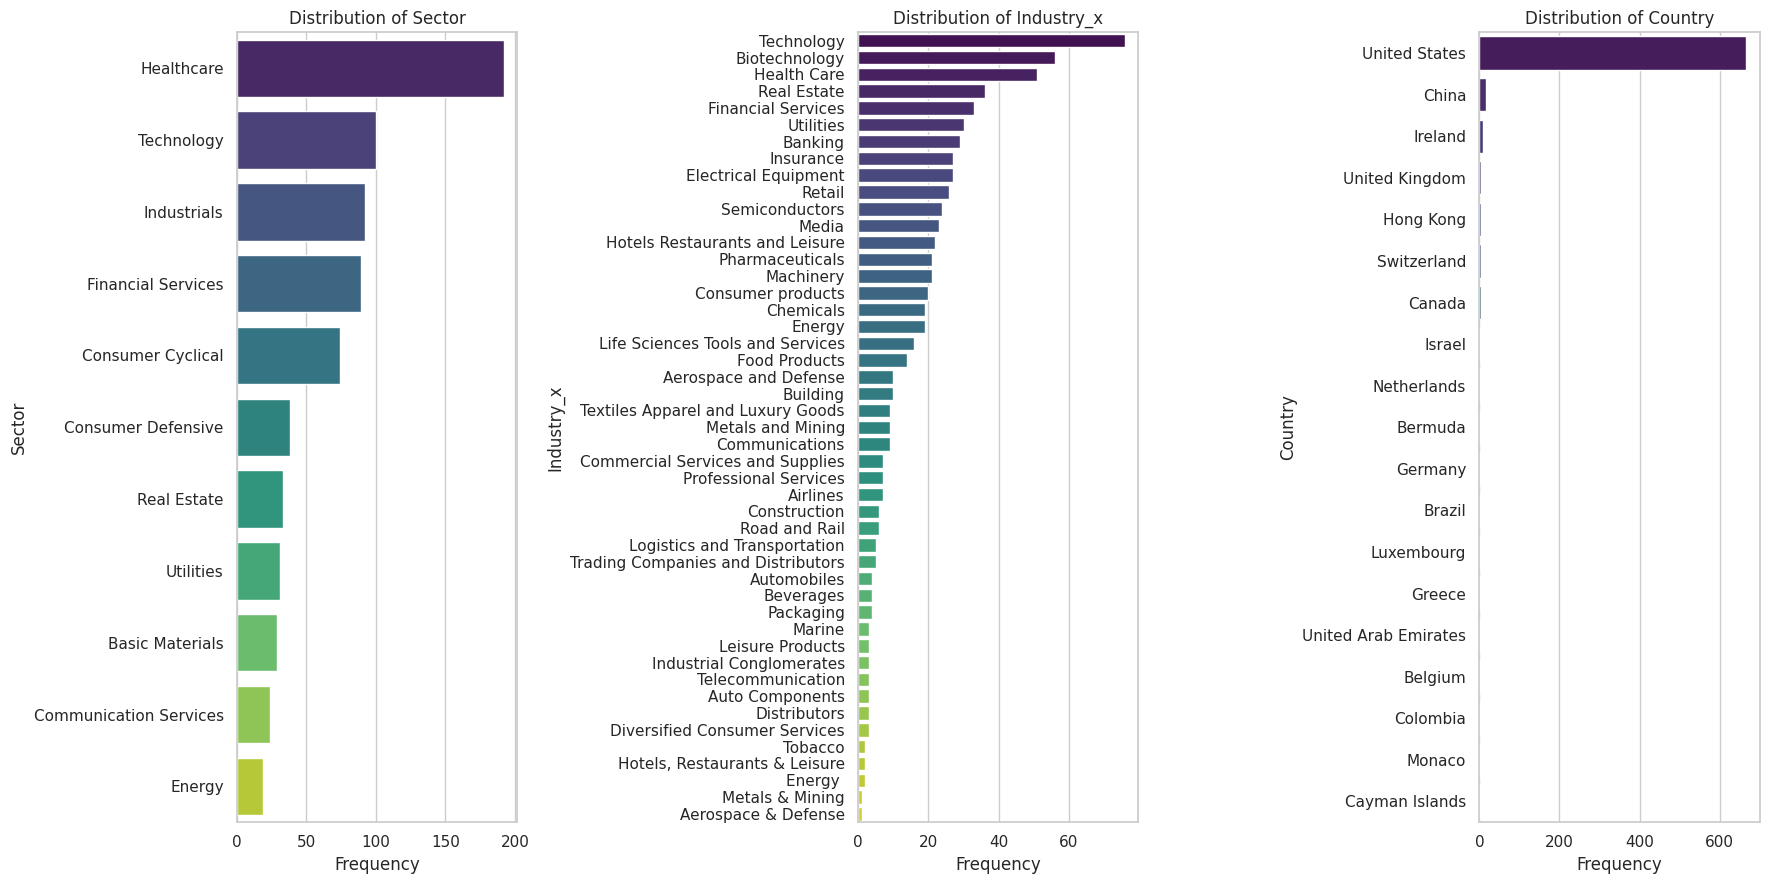

In [ ]:
categorical_columns = ['Sector', 'Industry_x', 'Country']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 9))
axes = axes.flatten()

for ax, column in zip(axes, categorical_columns):
    sns.countplot(y=merged_df_cleaned[column], ax=ax, palette='viridis', order=merged_df_cleaned[column].value_counts().index)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel('Frequency')
    ax.set_ylabel(column)

plt.tight_layout()
plt.show()

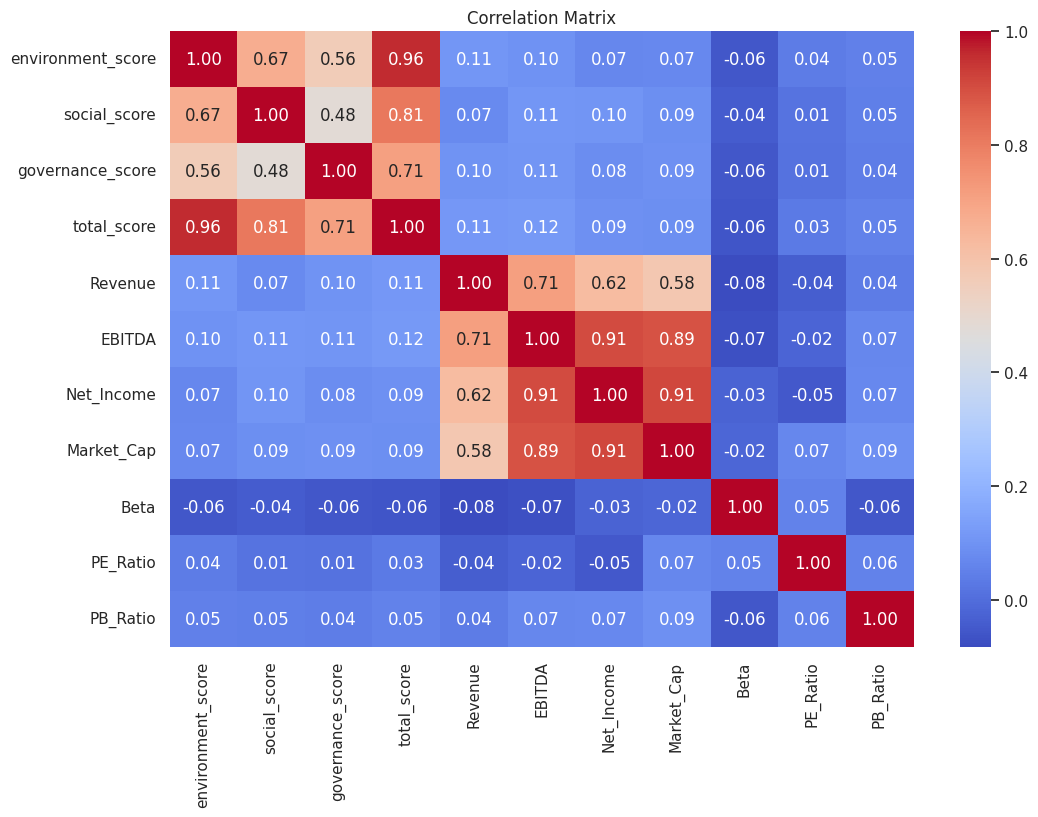

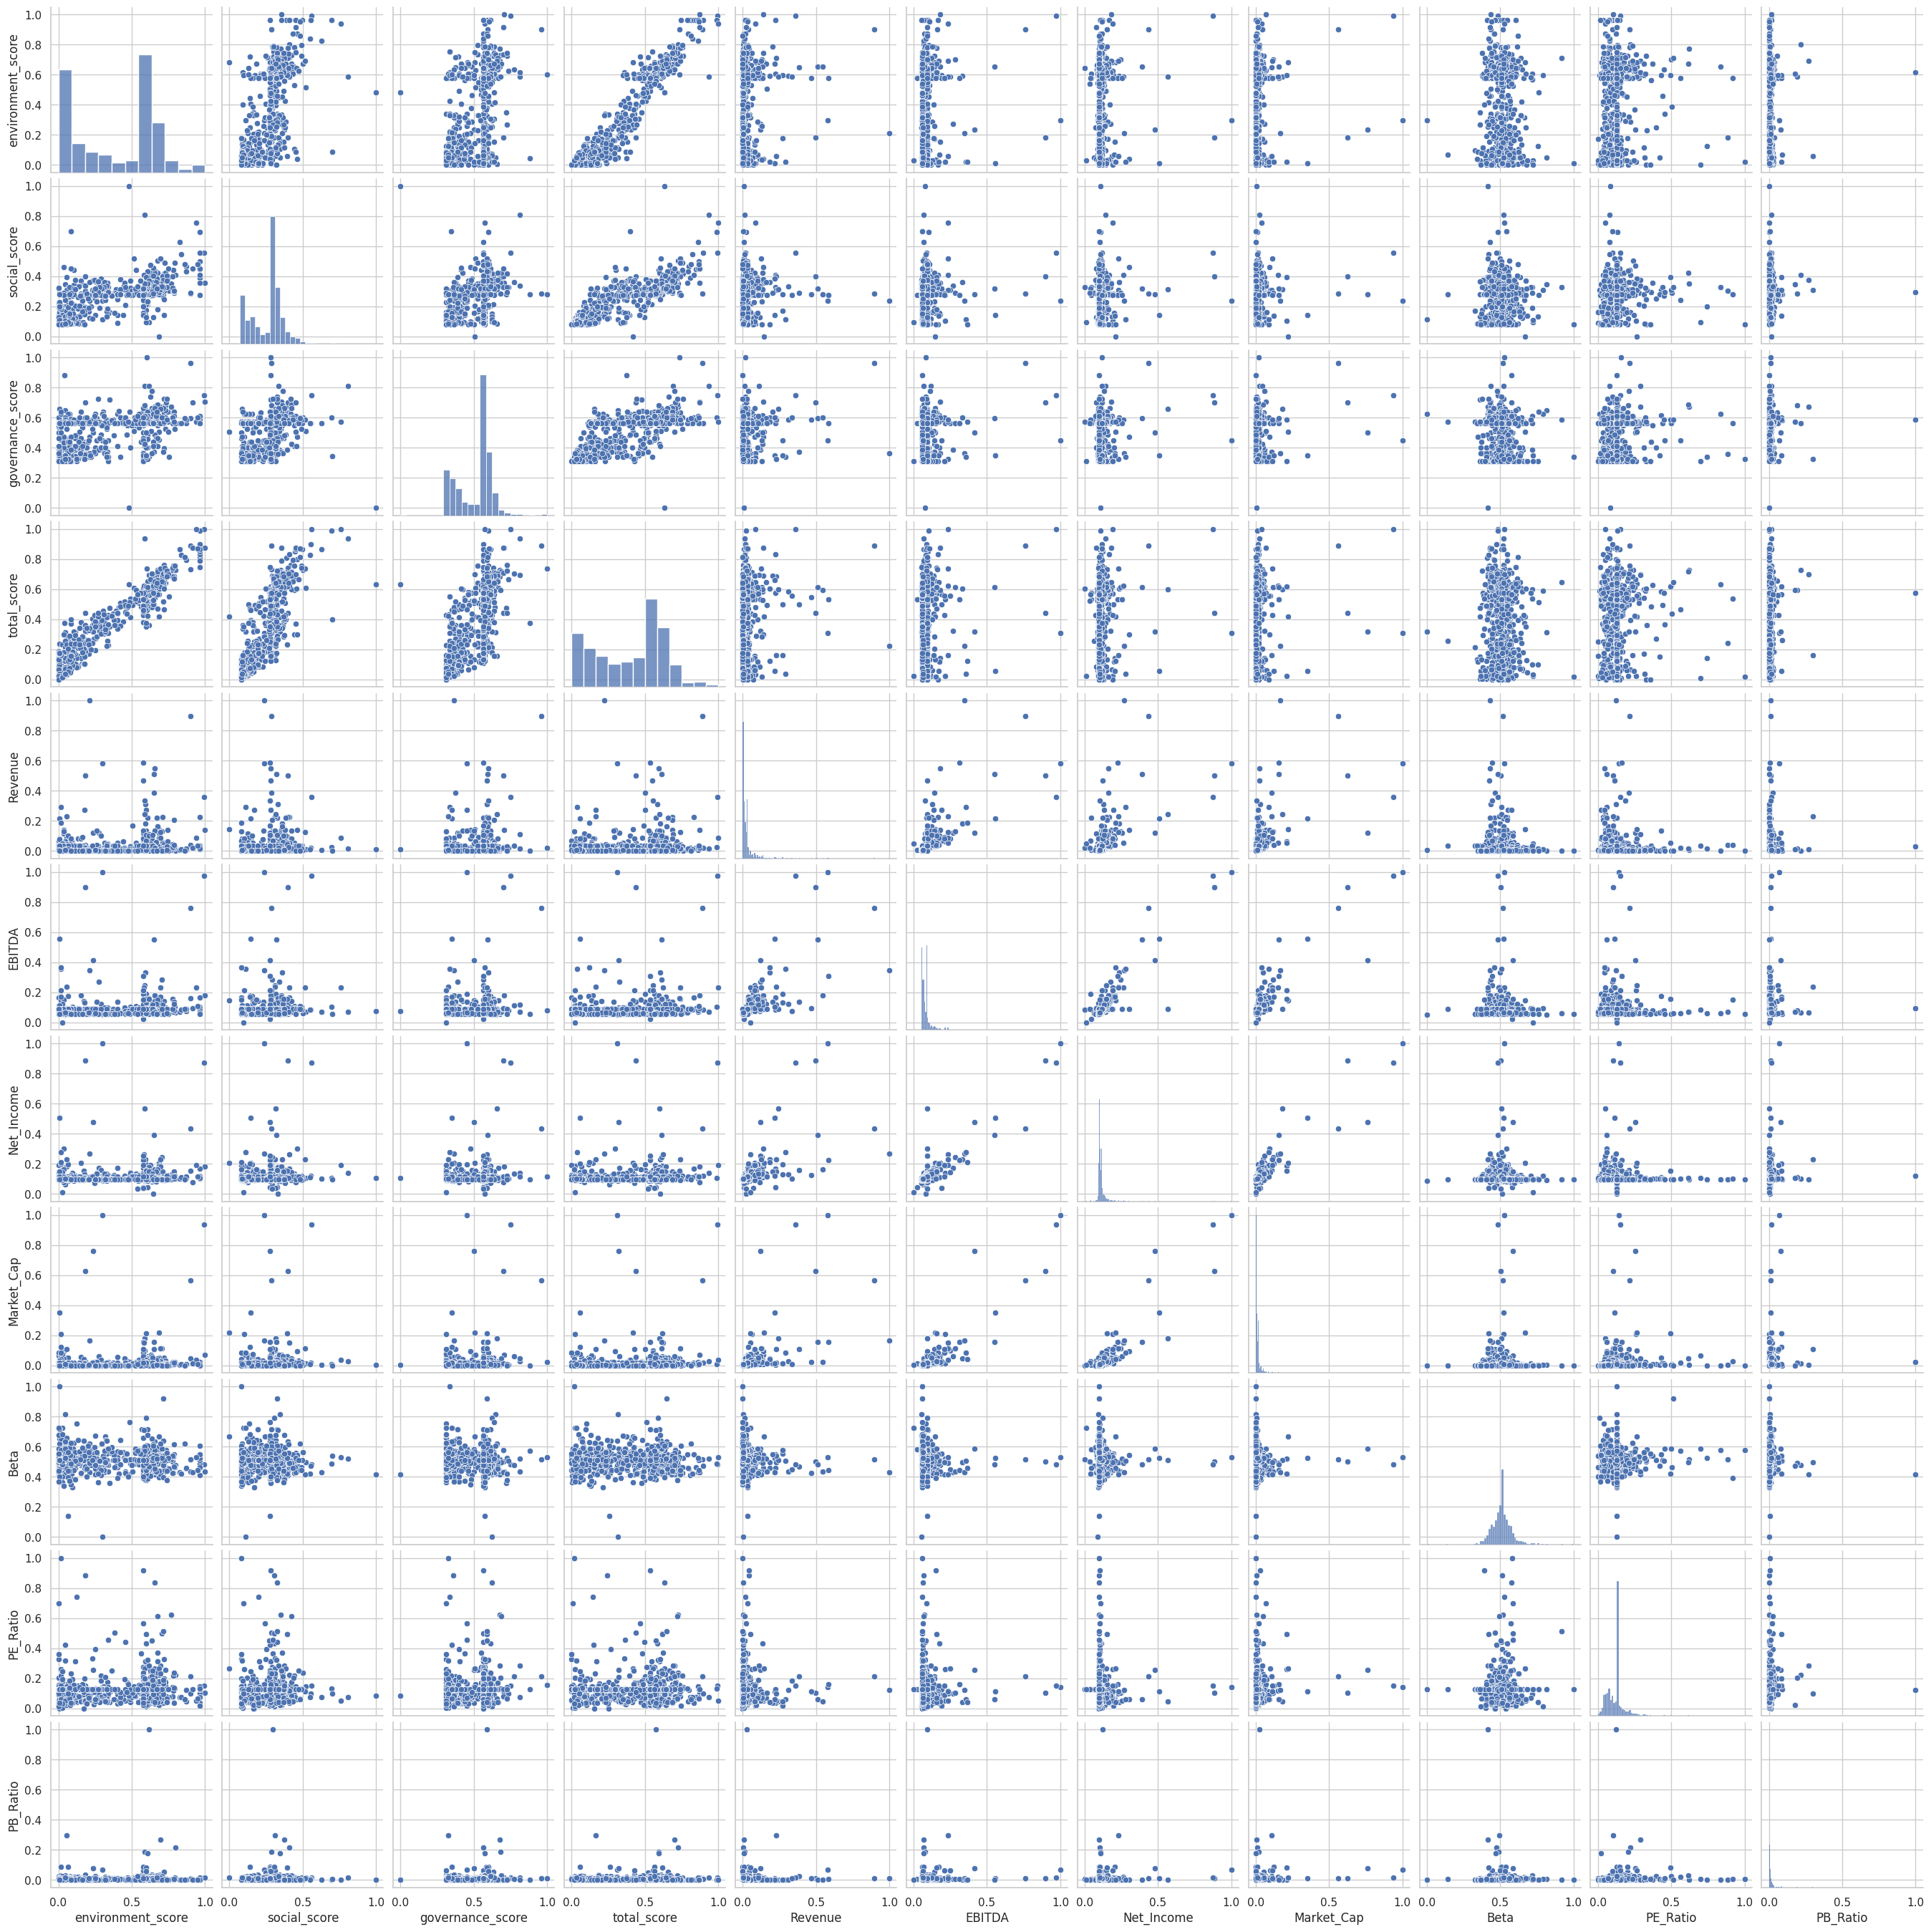

In [ ]:
#feature selection

esg_dataset = pd.read_csv('/content/normalized_data_esg.csv')
financial_dataset = pd.read_csv('/content/normalized_data_financial.csv')
esg_features = esg_dataset[['Ticker_Symbol', 'environment_score', 'social_score', 'governance_score', 'total_score']]
financial_features = financial_dataset[['Ticker_Symbol', 'Revenue', 'EBITDA', 'Net_Income', 'Market_Cap', 'Beta', 'PE_Ratio', 'PB_Ratio']]

merged_dataset = pd.merge(esg_features, financial_features, on='Ticker_Symbol')

numerical_columns = ['environment_score', 'social_score', 'governance_score', 'total_score',
                     'Revenue', 'EBITDA', 'Net_Income', 'Market_Cap', 'Beta', 'PE_Ratio', 'PB_Ratio']

correlation_matrix = merged_dataset[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

sns.pairplot(merged_dataset[numerical_columns])
plt.show()

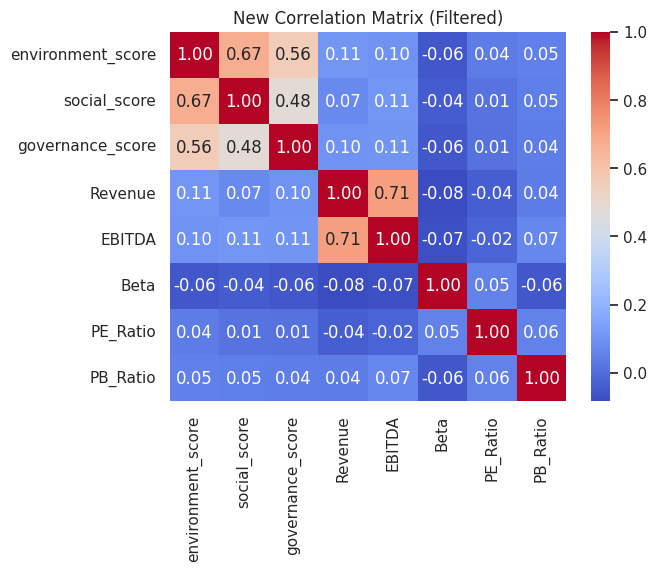

In [ ]:
threshold = 0.85
to_drop = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            to_drop.add(colname)
dummy_dataset = merged_dataset.drop(columns=to_drop)
remaining_numerical_columns = [col for col in numerical_columns if col not in to_drop]

new_correlation_matrix = dummy_dataset[remaining_numerical_columns].corr()
sns.heatmap(new_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('New Correlation Matrix (Filtered)')
plt.show()


In [ ]:
dummy_dataset.to_csv('dummy_dataset.csv', index=False)
print(dummy_dataset)


    Ticker_Symbol  environment_score  social_score  governance_score  \
0             DIS           0.597303      0.307692            0.6150   
1              GM           0.597303      0.282051            0.4500   
2             GWW           0.105973      0.443787            0.4125   
3             MHK           0.712909      0.272189            0.5700   
4             LYV           0.562620      0.295858            0.4375   
..            ...                ...           ...               ...   
716            HI           0.556840      0.372781            0.5625   
717           HHC           0.578035      0.276134            0.5625   
718          HUBS           0.539499      0.333333            0.6125   
719          HESM           0.206166      0.191321            0.4500   
720           HEI           0.048170      0.084813            0.3250   

      Revenue    EBITDA      Beta  PE_Ratio  PB_Ratio  
0    0.135779  0.175017  0.548577  0.431935  0.002570  
1    0.270996  0.188299

# Model Training

In [ ]:
#encode categorical data
label_encoding=LabelEncoder()
dummy_dataset['Ticker_Encode']=label_encoding.fit_transform(dummy_dataset['Ticker_Symbol'])
df=dummy_dataset.drop(columns=['Ticker_Symbol'])
df


,environment_score,social_score,governance_score,Revenue,EBITDA,Beta,PE_Ratio,PB_Ratio,Ticker_Encode
0,0.597303,0.307692,0.6150,0.135779,0.175017,0.548577,0.431935,0.002570,265
1,0.597303,0.282051,0.4500,0.270996,0.188299,0.554061,0.019454,0.001042,330
2,0.105973,0.443787,0.4125,0.025371,0.078095,0.518934,0.111736,0.022254,343
3,0.712909,0.272189,0.5700,0.016604,0.068519,0.546618,0.130305,0.001987,432
4,0.562620,0.295858,0.4375,0.035713,0.069476,0.541264,0.364188,0.011215,418
...,...,...,...,...,...,...,...,...,...
716,0.556840,0.372781,0.5625,0.004707,0.061318,0.555759,0.153386,0.002725,381
717,0.578035,0.276134,0.5625,0.035061,0.090095,0.509863,0.130305,0.011215,380
718,0.539499,0.333333,0.6125,0.003563,0.056951,0.574954,0.130305,0.025665,393
719,0.206166,0.191321,0.4500,0.002214,0.065206,0.561504,0.071243,0.011181,378


In [ ]:
#train model
features = ['environment_score', 'social_score', 'governance_score', 'Revenue',
            'Beta', 'PE_Ratio', 'PB_Ratio']

X = df[features]
y = df['EBITDA']


#for checking null value
X.isnull().sum()


,0
environment_score,0
social_score,0
governance_score,0
Revenue,0
Beta,0
PE_Ratio,0
PB_Ratio,0


In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

In [ ]:
# (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Initialize and train Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_scaled, y_train)

y_pred_rf = rf_reg.predict(X_test_scaled)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R-squared: {r2_rf}")


Random Forest Mean Squared Error: 0.003352075471881076
Random Forest R-squared: 0.6494930864217527


**Mean Squared Error (MSE):** 0.00335 — This reflects the average squared difference between the actual and predicted values. A smaller value indicates better model accuracy.

**R-squared (R²):** 0.6495 — This shows that 64.95% of the variance in the target variable is explained by the model. While the model captures a significant portion of the variability, it is less accurate than other models with a higher R².

In [ ]:
# Initialize and train XGBoost Regressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_reg.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_reg.predict(X_test_scaled)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Mean Squared Error: {mse_xgb}")
print(f"XGBoost R-squared: {r2_xgb}")


XGBoost Mean Squared Error: 0.0017022789308362878
XGBoost R-squared: 0.8220026550410933


**Mean Squared Error (MSE):** 0.0017 — This indicates the average squared difference between the actual and predicted values. A lower value means better accuracy.

**R-squared (R²):** 0.8220 — This represents the proportion of variance in the target variable explained by the model. An R² of 0.822 suggests that the model explains 82.2% of the variability in the data, showing strong predictive power.

In [ ]:
# Feature importance from XGBoost
xgb_importances = xgb_reg.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': xgb_importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


             Feature  Importance
3            Revenue    0.405744
4               Beta    0.349766
0  environment_score    0.112478
6           PB_Ratio    0.069628
5           PE_Ratio    0.026478
2   governance_score    0.021686
1       social_score    0.014220


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

grid_search = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror'), param_grid=param_grid, cv=3, scoring='r2', verbose=1)

grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)


best_xgb = grid_search.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test_scaled)

mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)

print(f"Tuned XGBoost Mean Squared Error: {mse_best_xgb}")
print(f"Tuned XGBoost R-squared: {r2_best_xgb}")


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters found:  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
Tuned XGBoost Mean Squared Error: 0.001919516180267046
Tuned XGBoost R-squared: 0.7992874272811783


       Actual  Predicted
259  0.077055   0.127746
658  0.058144   0.077053
77   0.090095   0.072538
65   0.057689   0.066742
81   0.056708   0.069755
223  0.096211   0.079879
335  0.090095   0.080976
264  0.061265   0.065998
515  0.072060   0.066798
346  0.098160   0.081673


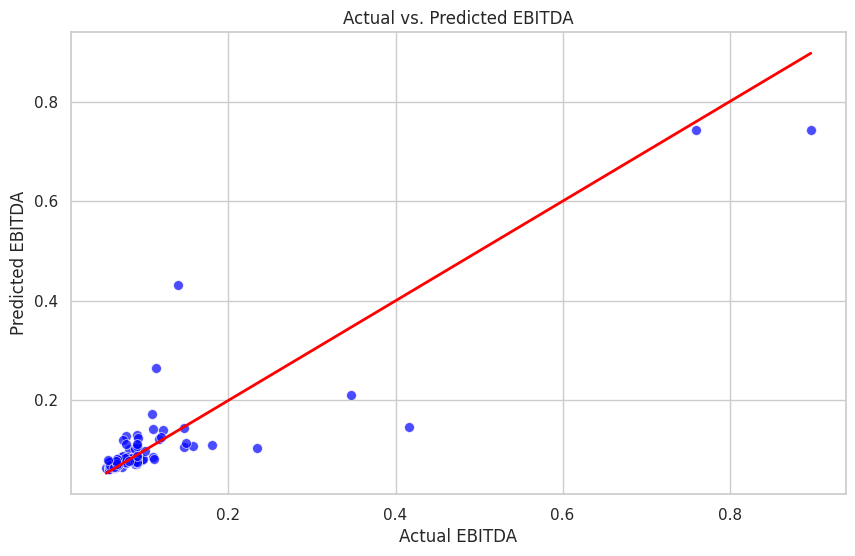

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_best_xgb
})

print(results_df.head(10))
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Actual', y='Predicted', data=results_df, color='blue', s=50, alpha=0.7)

plt.plot([results_df['Actual'].min(), results_df['Actual'].max()],
         [results_df['Actual'].min(), results_df['Actual'].max()], color='red', lw=2)

plt.title('Actual vs. Predicted EBITDA')
plt.xlabel('Actual EBITDA')
plt.ylabel('Predicted EBITDA')
plt.show()


In [ ]:
results_df

,Actual,Predicted
259,0.077055,0.127746
658,0.058144,0.077053
77,0.090095,0.072538
65,0.057689,0.066742
81,0.056708,0.069755
...,...,...
426,0.090095,0.113334
136,0.759947,0.742012
265,0.076924,0.112478
6,0.065918,0.078733


In [ ]:
#adding ticker symbol
results_df['Ticker_Symbol'] = dummy_dataset.loc[X_test.index, 'Ticker_Symbol']
print(results_df.head())


       Actual  Predicted Ticker_Symbol
259  0.077055   0.127746            BA
658  0.058144   0.077053          PNRG
77   0.090095   0.072538          AFCG
65   0.057689   0.066742          AEHR
81   0.056708   0.069755          AGEN


In [ ]:
# Sorting
results_df = results_df.sort_values(by='Predicted', ascending=False)

print(results_df.head(25))


       Actual  Predicted Ticker_Symbol
136  0.759947   0.742012          AMZN
164  0.897123   0.742012         GOOGL
148  0.139344   0.432204          COST
215  0.112976   0.264092           UAL
430  0.346580   0.209841           WMT
399  0.108221   0.173512           TJX
181  0.415833   0.145962          NVDA
211  0.146141   0.144381          TSLA
328  0.109166   0.142801           MMC
398  0.121024   0.140677           TGT
260  0.090095   0.130807           BAC
259  0.077055   0.127746            BA
557  0.119766   0.125909            GE
326  0.091908   0.125326           MET
131  0.116531   0.122209          AMAT
404  0.074169   0.120157           TSN
533  0.149682   0.114064          GILD
426  0.090095   0.113334           WFC
265  0.076924   0.112478           BBY
442  0.180644   0.110482           CVS
294  0.157613   0.108865           DUK
453  0.090095   0.108174           COF
473  0.146287   0.106200           OXY
334  0.090095   0.106081            MS
451  0.234173   0.105336 

In [ ]:
# Difference between Actual and Predicted
results_df['Difference'] = abs(results_df['Actual'] - results_df['Predicted'])

# Filtering
threshold = 0.05
filtered_results_df = results_df[results_df['Difference'] <= threshold]

# Sort by closest diff
filtered_results_df = filtered_results_df.sort_values(by='Difference')
print(filtered_results_df[['Ticker_Symbol', 'Actual', 'Predicted', 'Difference']].head(10))


    Ticker_Symbol    Actual  Predicted  Difference
512           ESS  0.065556   0.065192    0.000363
231           ABC  0.090095   0.089502    0.000593
432           YUM  0.076292   0.077190    0.000898
371           PXD  0.090095   0.089187    0.000908
394           TEL  0.084551   0.083594    0.000957
350           PHM  0.084661   0.083645    0.001016
422           WAT  0.064947   0.066024    0.001077
352           PKI  0.090095   0.088977    0.001118
281          CDAY  0.090095   0.088977    0.001118
133          ATVI  0.090095   0.088906    0.001189
